# TikTok Project
**Phase 4 - Regression Analysis: Simplify complex data relationships**

In this activity, I will build a logistic regression model in Python.

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.

## Prepare and Clean Data

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

### Expolre Data with EDA
The purposes of EDA before constructing a logistic regression model are:
1) To identify data anomalies such as outliers and class imbalance that might affect the modeling
2) To verify model assumptions such as no severe multicollinearity

In [3]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get number of rows and columns
data.shape

(19382, 12)

In [5]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [6]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

### Handle missing values

In [10]:
# Drop rows with missing values
df = df.dropna(axis=0)
df.shape

(19084, 10)

### Remove irrelevant columns

In [9]:
df = data.drop(['#', 'video_id'], axis=1)
df.columns

Index(['claim_status', 'video_duration_sec', 'video_transcription_text',
       'verified_status', 'author_ban_status', 'video_view_count',
       'video_like_count', 'video_share_count', 'video_download_count',
       'video_comment_count'],
      dtype='object')

### Check for duplicates

In [11]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

### Hanandle outliers

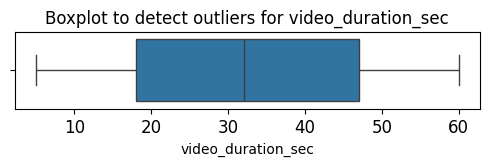

In [12]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(6,1))
plt.title('Boxplot to detect outliers for video_duration_sec', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['video_duration_sec'])
plt.show()

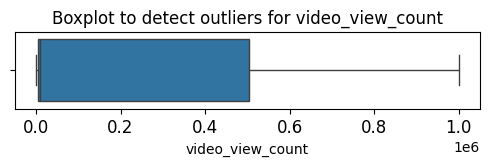

In [13]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(6,1))
plt.title('Boxplot to detect outliers for video_view_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['video_view_count'])
plt.show()

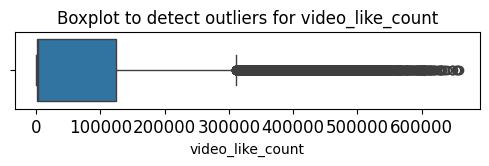

In [14]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(6,1))
plt.title('Boxplot to detect outliers for video_like_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['video_like_count'])
plt.show()

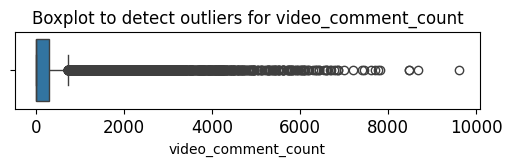

In [15]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(6,1))
plt.title('Boxplot to detect outliers for video_comment_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['video_comment_count'])
plt.show()

In [16]:
# Remove outliers

percentile25 = df["video_like_count"].quantile(0.25)
percentile75 = df["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

df.loc[df["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

In [17]:
# Remove outliers

percentile25 = df["video_comment_count"].quantile(0.25)
percentile75 = df["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

df.loc[df["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

### Class balancing

In [18]:
# Check class balance
df["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

In [19]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
data_majority = df[df["verified_status"] == "not verified"]
data_minority = df[df["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
df = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
df["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

### Feature engineering
Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [20]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
df[["verified_status", "video_transcription_text"]].groupby(by="verified_status"
                                                           )[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [21]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
df["text_length"] = df["video_transcription_text"].apply(func=lambda text: len(text))

In [22]:
df.head(2)

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

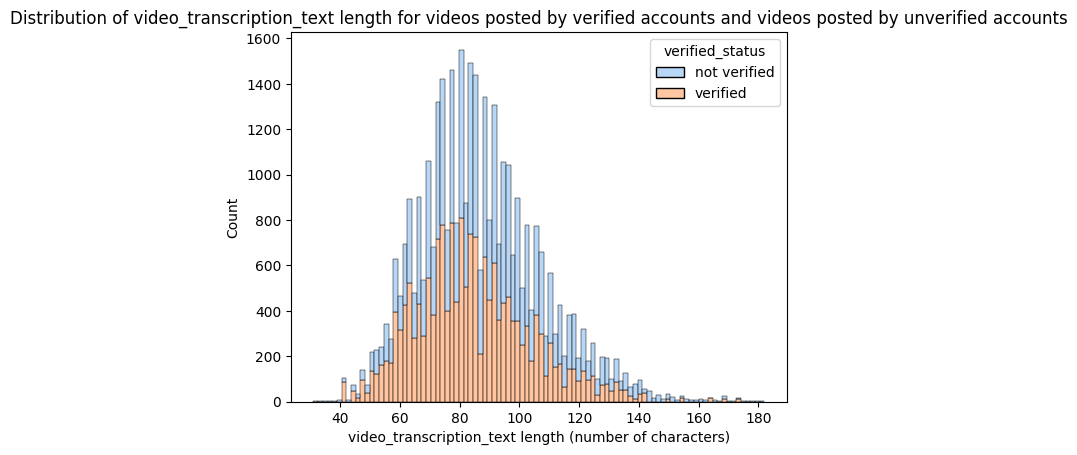

In [23]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data=df, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

### Examine correlations

In [25]:
numeric = df.select_dtypes(include=['float64', 'int64'])
print(numeric.columns)

Index(['video_duration_sec', 'video_view_count', 'video_like_count',
       'video_share_count', 'video_download_count', 'video_comment_count',
       'text_length'],
      dtype='object')


In [26]:
# Code a correlation matrix to help determine most correlated variables                           
numeric.corr()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
video_duration_sec,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.002981
video_view_count,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.244693
video_like_count,0.004494,0.856937,1.000000,0.832146,0.805543,0.818032,0.216693
video_share_count,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.171651
video_download_count,0.003989,0.690048,0.805543,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.001086,0.748361,0.818032,0.671335,0.793668,1.000000,0.217661
text_length,-0.002981,0.244693,0.216693,0.171651,0.173396,0.217661,1.000000


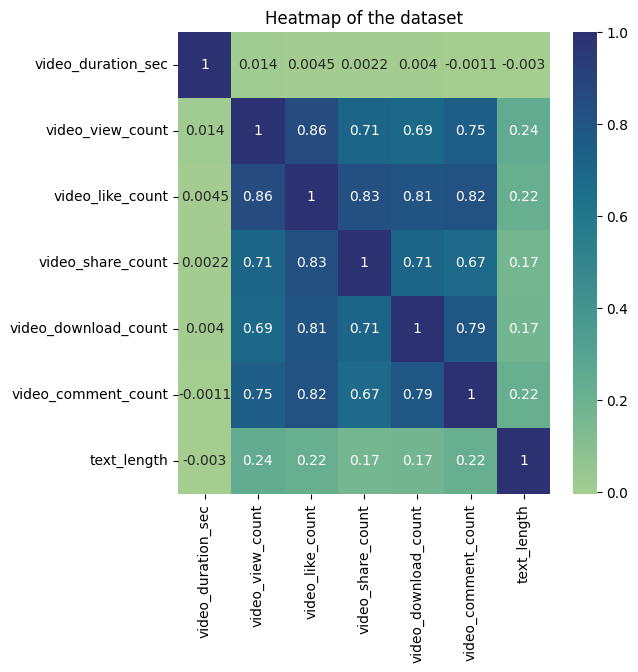

In [27]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(6,6))
sns.heatmap(numeric.corr(), annot=True, cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. The above heatmap shows that the following pair of variables are strongly correlated: `video_view_count` and `video_like_count` (0.85 correlation coefficient). To build a logistic regression model that meets this assumption, we could exclude `video_like_count`. And among the variables that quantify video metrics, we could keep `video_view_count`, `video_share_count`, `video_download_count`, and `video_comment_count` as features.

### Variable encoding

In [28]:
# Get unique values in `claim_status`
print(f"Unique values in the claim_status column: {df['claim_status'].unique()}")
# Get unique values in `author_ban_status`
print(f"Unique values in the author_ban_status column: {df['author_ban_status'].unique()}")

Unique values in the claim_status column: ['claim' 'opinion']
Unique values in the author_ban_status column: ['under review' 'active' 'banned']


In [31]:
# Select the training features that needs to be encoded
to_encode = df[["claim_status", "author_ban_status"]]

# Set up an encoder for one-hot encoding the categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the training features using the encoder
encoded = encoder.fit_transform(to_encode)

# Get feature names from encoder
encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [32]:
# Place encoded training features (which is currently an array) into a dataframe
df_encoded = pd.DataFrame(data=encoded, columns=encoder.get_feature_names_out())

# Display first few rows
df_encoded.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [35]:
df = pd.concat([df, df_encoded], axis=1)
df.head(3)

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97,0.0,0.0,1.0
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107,0.0,0.0,0.0
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137,0.0,0.0,0.0


## Build Logistic Regression Model
### Select X and Y

In [43]:
# Select outcome variable
Y = df["verified_status"]

In [44]:
# Select features
X = df[['video_duration_sec', 'video_view_count', 'video_share_count',
        'video_download_count', 'video_comment_count', 'text_length', 'claim_status_opinion',
       'author_ban_status_banned', 'author_ban_status_under review']]

X.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,241.0,1.0,0.0,97,0.0,0.0,1.0
1,32,140877.0,19034.0,1161.0,684.0,107,0.0,0.0,0.0
2,31,902185.0,2858.0,833.0,329.0,137,0.0,0.0,0.0
3,25,437506.0,34812.0,1234.0,584.0,131,0.0,0.0,0.0
4,19,56167.0,4110.0,547.0,152.0,128,0.0,0.0,0.0


**Note:** `video_like_count` is not selected as a feature here, because it is strongly correlated with other features, as discussed earlier. And logistic regression has a no multicollinearity model assumption that needs to be met.

### Train-test-validate split

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 9), (8942, 9), (26826,), (8942,))

### Model building

In [46]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train, y_train)

In [47]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test)

In [48]:
# Display the predictions on the encoded testing set
y_pred

array(['verified', 'verified', 'not verified', ..., 'verified',
       'not verified', 'verified'], dtype=object)

In [49]:
# Display the true labels of the testing set
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

### Visualize model results

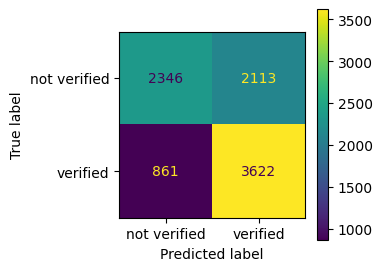

In [52]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(3,3))
log_disp.plot(ax=ax)

# Display plot
plt.show()

**Notes:**

The upper-left quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

The lower-left quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

The lower-right quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [54]:
# Create classification report for logistic regression model
target_labels = ["verified", "not verified"]
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.73      0.53      0.61      4459
not verified       0.63      0.81      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.68      0.67      0.66      8942
weighted avg       0.68      0.67      0.66      8942



**Note:** The classification report above shows that the logistic regression model achieved a precision of 68% and a recall of 67% (weighted averages), and it achieved an accuracy of 67%.

### Interpret model coefficients

In [55]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,-3.047904e-03
1,video_view_count,-2.883236e-07
2,video_share_count,4.921203e-06
3,video_download_count,-7.495608e-05
4,video_comment_count,3.731349e-04
5,text_length,-2.288115e-03
6,claim_status_opinion,1.545392e+00
7,author_ban_status_banned,-5.611838e-01
8,author_ban_status_under review,-3.223819e-01


## Conclusion

**Key takeaways:**

- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` from the model building.
- Based on the logistic regression model, each additional second of the video is associated with 0.01 increase in the log-odds of the user having a verified status.
- The logistic regression model had decent predictive power: a precision of 69% and a recall of 66% (weighted averages), and it achieved an accuracy of 66%.


We developed a logistic regression model for verified status based on video features. The model had decent predictive power (69% precision and 66% recall). Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.